In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
OUTPUT_PATH = ''

# Research Question 1

In [4]:
def plot_scatter(data, color_map, lines, x_lim, legend=False, save_path=None):

    plt.xlim(0, x_lim)

    for line in lines:
        plt.axhline(y=line[0], color=line[2], linestyle=line[3], label=line[1])

        if line[4]:
            plt.annotate(line[1], (0, line[0]), xytext=(5, 5), textcoords="offset points", ha="left", va="bottom")
        

    for group in data.keys():
        data_g = data[group]
        x = list(map(lambda p: p[0], data_g))
        y = list(map(lambda p: p[1], data_g))
    
        plt.scatter(x, y, marker=color_map[group][1], c=color_map[group][0], label=group)
    
        for i, (x_val, y_val) in enumerate(zip(x, y)):
            label = data_g[i][2]  # Label text
            plt.annotate(label, (x_val, y_val), xytext=(5, -5), # Offset from point
                         textcoords="offset points", ha="left", va="bottom")
    if legend:
        plt.legend()

    if save_path == None:
        plt.show()
    else:
        plt.savefig(save_path)
    
    

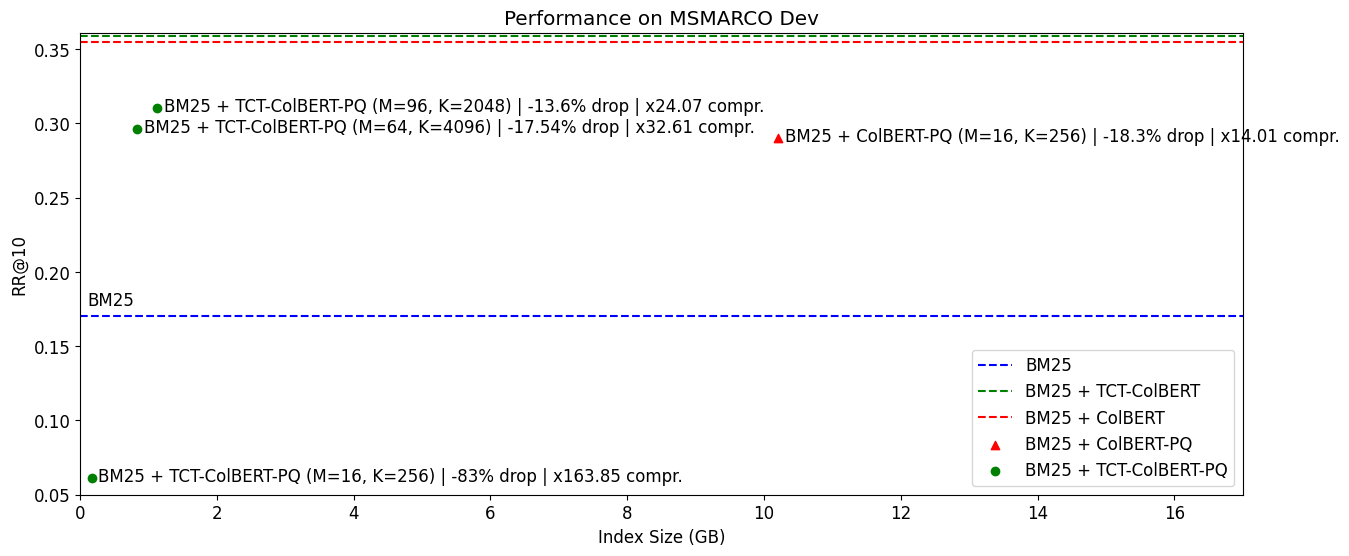

In [120]:
# TCT MSMARCO PASSAGE DEV

data = {
    'BM25 + ColBERT-PQ': [(10.2, 0.290, 'BM25 + ColBERT-PQ (M=16, K=256) | -18.3% drop | x14.01 compr.')],
    'BM25 + TCT-ColBERT-PQ': [
        (0.166, 0.061, 'BM25 + TCT-ColBERT-PQ (M=16, K=256) | -83% drop | x163.85 compr.'),
        (0.834, 0.296, 'BM25 + TCT-ColBERT-PQ (M=64, K=4096) | -17.54% drop | x32.61 compr.'),
        (1.13, 0.31, 'BM25 + TCT-ColBERT-PQ (M=96, K=2048) | -13.6% drop | x24.07 compr.')
    ],
}

color_map = {
        'BM25 + ColBERT-PQ': ('red', '^'),
        'BM25 + TCT-ColBERT-PQ': ('green', 'o'),
}

lines = [
    (0.170, 'BM25', 'blue', '--', True),
    (0.359, 'BM25 + TCT-ColBERT', 'green', '--', False),
    (0.355, 'BM25 + ColBERT', 'red', '--', False),
]

# plt.rc('font', size=12)
plt.figure(figsize=(15, 6))
plt.ylim(0.05, 0.361)
plt.xlabel('Index Size (GB)')
plt.ylabel('RR@10')
plt.title('Performance on MSMARCO Dev')
plot_scatter(data, color_map, lines, 17, legend=True, 
             save_path='/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq1_model_comparison/tct_dev.png')

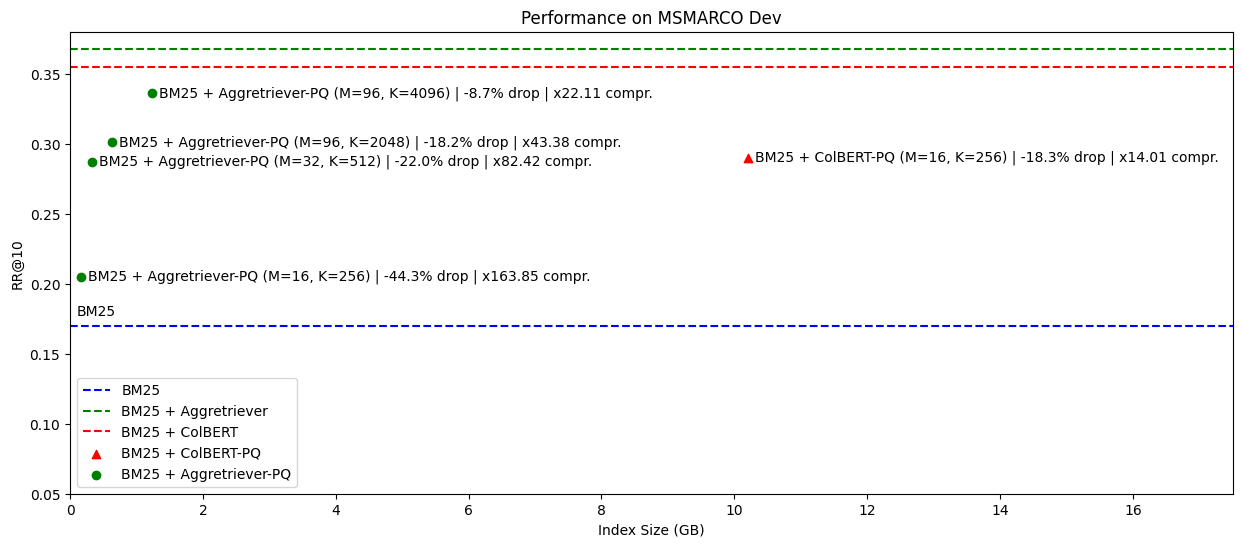

In [167]:
# AGG Retriever

data = {
    'BM25 + ColBERT-PQ': [(10.2, 0.290, 'BM25 + ColBERT-PQ (M=16, K=256) | -18.3% drop | x14.01 compr.')],
    'BM25 + Aggretriever-PQ': [
        (0.166, 0.205, 'BM25 + Aggretriever-PQ (M=16, K=256) | -44.3% drop | x163.85 compr.'),
        (0.330, 0.287, 'BM25 + Aggretriever-PQ (M=32, K=512) | -22.0% drop | x82.42 compr.'),
        (0.627, 0.301, 'BM25 + Aggretriever-PQ (M=96, K=2048) | -18.2% drop | x43.38 compr.'),
        (1.23, 0.336, 'BM25 + Aggretriever-PQ (M=96, K=4096) | -8.7% drop | x22.11 compr.')
    ],
}

color_map = {
        'BM25 + ColBERT-PQ': ('red', '^'),
        'BM25 + Aggretriever-PQ': ('green', 'o'),
}

lines = [
    (0.170, 'BM25', 'blue', '--', True),
    (0.368, 'BM25 + Aggretriever', 'green', '--', False),
    (0.355, 'BM25 + ColBERT', 'red', '--', False),
]


plt.figure(figsize=(15, 6))
plt.ylim(0.05, 0.38)
plt.xlabel('Index Size (GB)')
plt.ylabel('RR@10')
plt.title('Performance on MSMARCO Dev')
plot_scatter(data, color_map, lines, 17.5, legend=True, 
             save_path='/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq1_model_comparison/agg_dev.png')

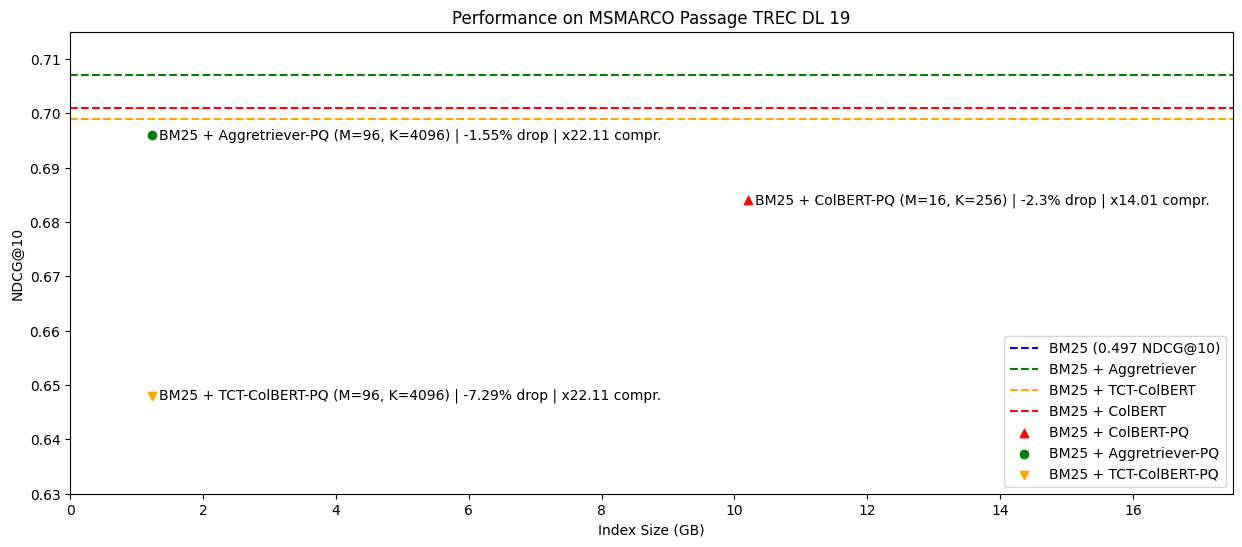

In [192]:
# Test 2019

data = {
    'BM25 + ColBERT-PQ': [(10.2, 0.684, 'BM25 + ColBERT-PQ (M=16, K=256) | -2.3% drop | x14.01 compr.')],
    'BM25 + Aggretriever-PQ': [
        (1.23, 0.696, 'BM25 + Aggretriever-PQ (M=96, K=4096) | -1.55% drop | x22.11 compr.')
    ],
    'BM25 + TCT-ColBERT-PQ': [
        (1.23, 0.648, 'BM25 + TCT-ColBERT-PQ (M=96, K=4096) | -7.29% drop | x22.11 compr.')
    ]
}

color_map = {
        'BM25 + ColBERT-PQ': ('red', '^'),
        'BM25 + Aggretriever-PQ': ('green', 'o'),
        'BM25 + TCT-ColBERT-PQ': ('orange', 'v'),
}

lines = [
    (0.497, 'BM25 (0.497 NDCG@10)', 'blue', '--', False),
    (0.707, 'BM25 + Aggretriever', 'green', '--', False),
    (0.699, 'BM25 + TCT-ColBERT', 'orange', '--', False),
    (0.701, 'BM25 + ColBERT', 'red', '--', False),
]


plt.figure(figsize=(15, 6))
plt.ylim(0.63, 0.715)
plt.xlabel('Index Size (GB)')
plt.ylabel('NDCG@10')
plt.title('Performance on MSMARCO Passage TREC DL 19')
plot_scatter(data, color_map, lines, 17.5, legend=True, 
             save_path='/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq1_model_comparison/test_2019.png')

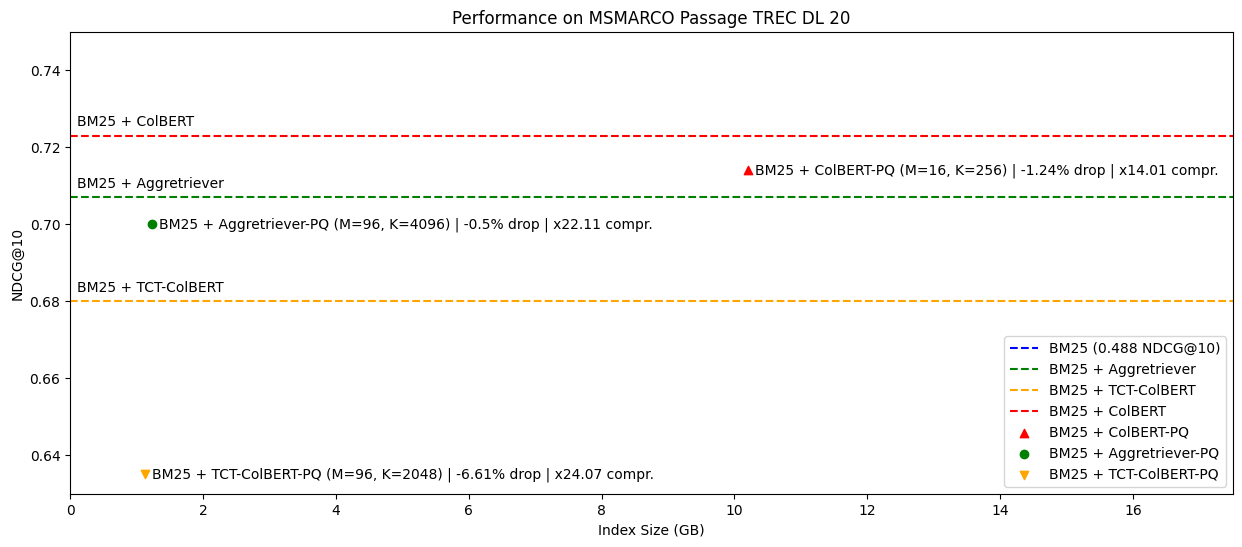

In [191]:
# Test 2020

data = {
    'BM25 + ColBERT-PQ': [(10.2, 0.714, 'BM25 + ColBERT-PQ (M=16, K=256) | -1.24% drop | x14.01 compr.')],
    'BM25 + Aggretriever-PQ': [
        (1.23, 0.7, 'BM25 + Aggretriever-PQ (M=96, K=4096) | -0.5% drop | x22.11 compr.')
    ],
    'BM25 + TCT-ColBERT-PQ': [
        (1.13, 0.635, 'BM25 + TCT-ColBERT-PQ (M=96, K=2048) | -6.61% drop | x24.07 compr.')
    ]
}

color_map = {
        'BM25 + ColBERT-PQ': ('red', '^'),
        'BM25 + Aggretriever-PQ': ('green', 'o'),
        'BM25 + TCT-ColBERT-PQ': ('orange', 'v'),
}

lines = [
    (0.488, 'BM25 (0.488 NDCG@10)', 'blue', '--', True),
    (0.707, 'BM25 + Aggretriever', 'green', '--', True),
    (0.680, 'BM25 + TCT-ColBERT', 'orange', '--', True),
    (0.723, 'BM25 + ColBERT', 'red', '--', True),
]


plt.figure(figsize=(15, 6))
plt.ylim(0.63, 0.75)
plt.xlabel('Index Size (GB)')
plt.ylabel('NDCG@10')
plt.title('Performance on MSMARCO Passage TREC DL 20')
plot_scatter(data, color_map, lines, 17.5, legend=True, 
             save_path='/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq1_model_comparison/test_2020.png')

# Research Question 2

## Bar charts for interpolation (TCT)

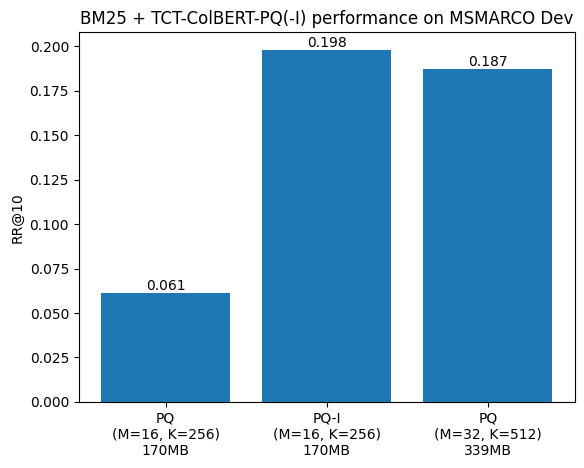

In [226]:
LABELS=['PQ\n(M=16, K=256)\n170MB', 'PQ-I\n(M=16, K=256)\n170MB', 'PQ\n(M=32, K=512)\n339MB']
SCORES=[0.061, 0.198, 0.187]
fig, ax = plt.subplots()
bars = ax.bar(LABELS, SCORES)
# Add labels to bars
ax.bar_label(bars)
ax.set_ylabel("RR@10")
ax.set_title('BM25 + TCT-ColBERT-PQ(-I) performance on MSMARCO Dev')
plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq2_barplots/tct_small.png')

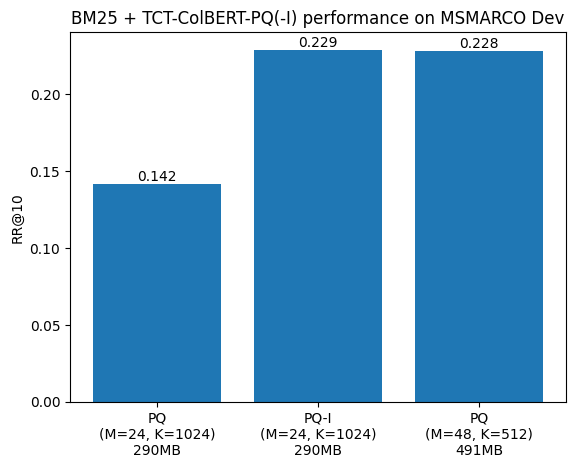

In [231]:
LABELS=['PQ\n(M=24, K=1024)\n290MB', 'PQ-I\n(M=24, K=1024)\n290MB', 'PQ\n(M=48, K=512)\n491MB']
SCORES=[0.142, 0.229, 0.228]
fig, ax = plt.subplots()
bars = ax.bar(LABELS, SCORES)
# Add labels to bars
ax.bar_label(bars)
ax.set_ylabel("RR@10")
ax.set_title('BM25 + TCT-ColBERT-PQ(-I) performance on MSMARCO Dev')
plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq2_barplots/tct_medium.png')

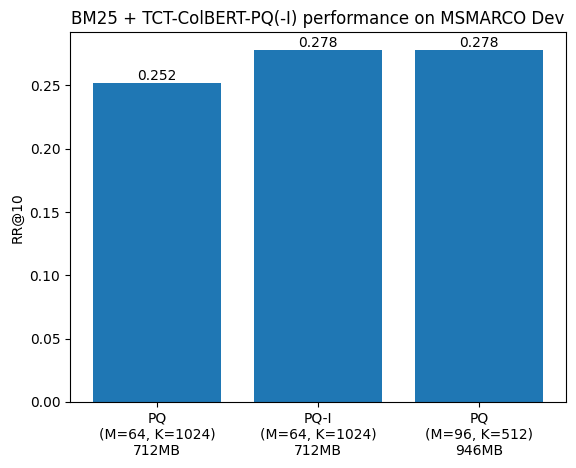

In [230]:
LABELS=['PQ\n(M=64, K=1024)\n712MB', 'PQ-I\n(M=64, K=1024)\n712MB', 'PQ\n(M=96, K=512)\n946MB']
SCORES=[0.252, 0.278, 0.278]
fig, ax = plt.subplots()
bars = ax.bar(LABELS, SCORES)
# Add labels to bars
ax.bar_label(bars)
ax.set_ylabel("RR@10")
ax.set_title('BM25 + TCT-ColBERT-PQ(-I) performance on MSMARCO Dev')
plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq2_barplots/tct_large.png')

## Bar charts for interpolation (Agg)

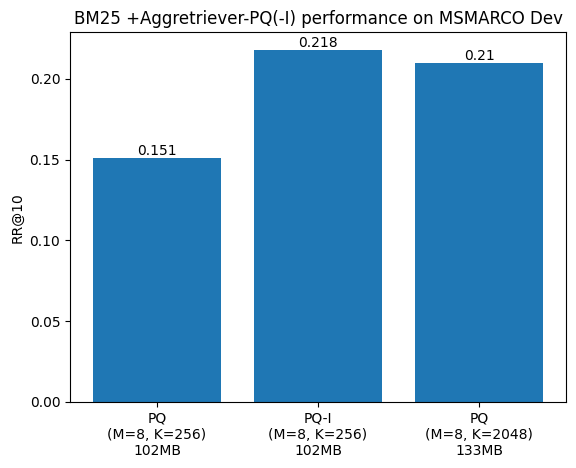

In [232]:
LABELS=['PQ\n(M=8, K=256)\n102MB', 'PQ-I\n(M=8, K=256)\n102MB', 'PQ\n(M=8, K=2048)\n133MB']
SCORES=[0.151, 0.218, 0.210]
fig, ax = plt.subplots()
bars = ax.bar(LABELS, SCORES)
# Add labels to bars
ax.bar_label(bars)
ax.set_ylabel("RR@10")
ax.set_title('BM25 +Aggretriever-PQ(-I) performance on MSMARCO Dev')
plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq2_barplots/agg_small.png')

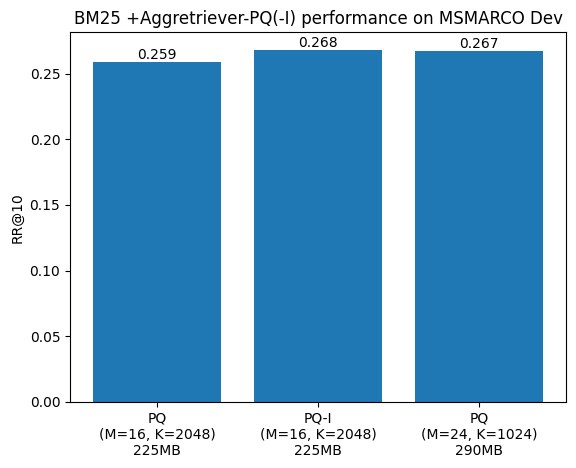

In [234]:
LABELS=['PQ\n(M=16, K=2048)\n225MB', 'PQ-I\n(M=16, K=2048)\n225MB', 'PQ\n(M=24, K=1024)\n290MB']
SCORES=[0.259, 0.268, 0.267]
fig, ax = plt.subplots()
bars = ax.bar(LABELS, SCORES)
# Add labels to bars
ax.bar_label(bars)
ax.set_ylabel("RR@10")
ax.set_title('BM25 +Aggretriever-PQ(-I) performance on MSMARCO Dev')
plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq2_barplots/agg_medium.png')

## Interpolation Final Results

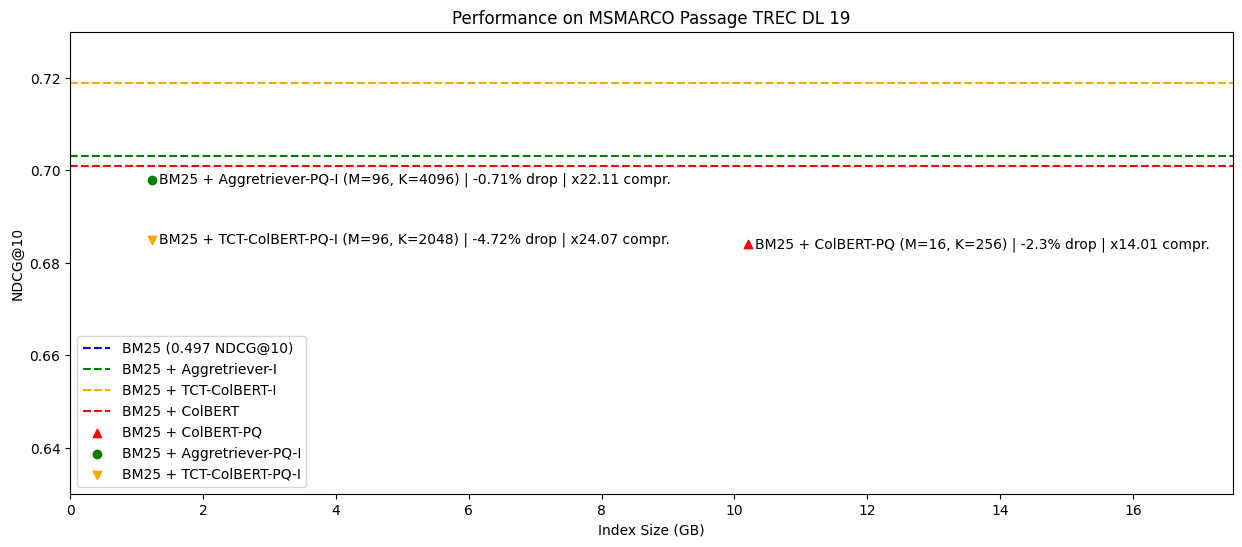

In [241]:
# Test 2019

data = {
    'BM25 + ColBERT-PQ': [(10.2, 0.684, 'BM25 + ColBERT-PQ (M=16, K=256) | -2.3% drop | x14.01 compr.')],
    'BM25 + Aggretriever-PQ-I': [
        (1.23, 0.698, 'BM25 + Aggretriever-PQ-I (M=96, K=4096) | -0.71% drop | x22.11 compr.')
    ],
    'BM25 + TCT-ColBERT-PQ-I': [
        (1.23, 0.685, 'BM25 + TCT-ColBERT-PQ-I (M=96, K=2048) | -4.72% drop | x24.07 compr.')
    ]
}

color_map = {
        'BM25 + ColBERT-PQ': ('red', '^'),
        'BM25 + Aggretriever-PQ-I': ('green', 'o'),
        'BM25 + TCT-ColBERT-PQ-I': ('orange', 'v'),
}

lines = [
    (0.497, 'BM25 (0.497 NDCG@10)', 'blue', '--', False),
    (0.703, 'BM25 + Aggretriever-I', 'green', '--', False),
    (0.719, 'BM25 + TCT-ColBERT-I', 'orange', '--', False),
    (0.701, 'BM25 + ColBERT', 'red', '--', False),
]


plt.figure(figsize=(15, 6))
plt.ylim(0.63, 0.73)
plt.xlabel('Index Size (GB)')
plt.ylabel('NDCG@10')
plt.title('Performance on MSMARCO Passage TREC DL 19')
plot_scatter(data, color_map, lines, 17.5, legend=True, 
             save_path='/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq2_model_comparison/test_2019.png')

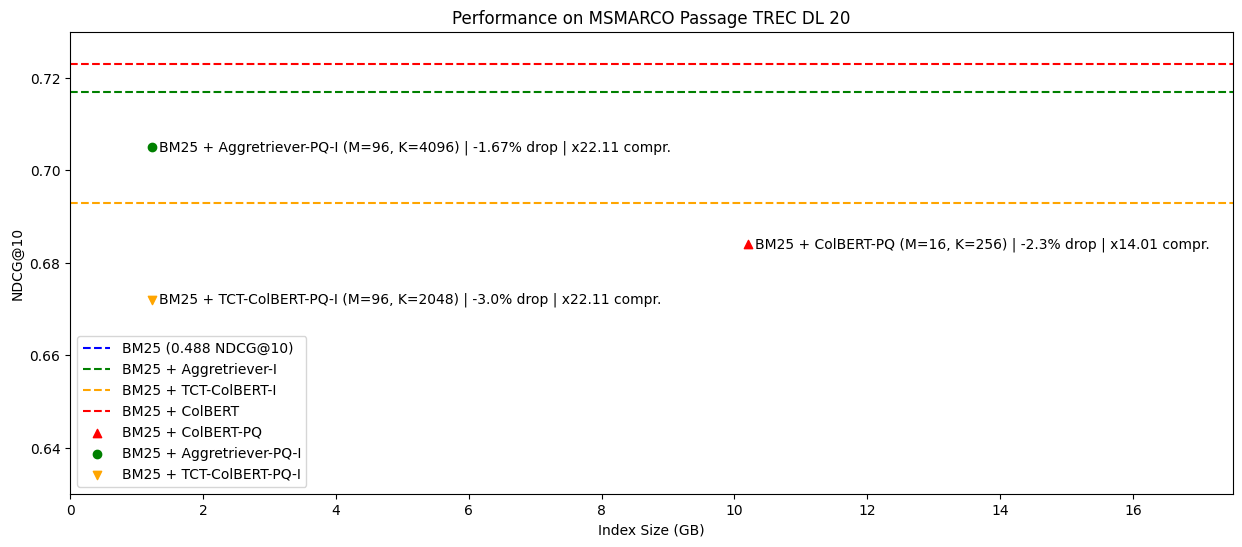

In [242]:
data = {
    'BM25 + ColBERT-PQ': [(10.2, 0.684, 'BM25 + ColBERT-PQ (M=16, K=256) | -2.3% drop | x14.01 compr.')],
    'BM25 + Aggretriever-PQ-I': [
        (1.23, 0.705, 'BM25 + Aggretriever-PQ-I (M=96, K=4096) | -1.67% drop | x22.11 compr.')
    ],
    'BM25 + TCT-ColBERT-PQ-I': [
        (1.23, 0.672, 'BM25 + TCT-ColBERT-PQ-I (M=96, K=2048) | -3.0% drop | x22.11 compr.')
    ]
}

color_map = {
        'BM25 + ColBERT-PQ': ('red', '^'),
        'BM25 + Aggretriever-PQ-I': ('green', 'o'),
        'BM25 + TCT-ColBERT-PQ-I': ('orange', 'v'),
}

lines = [
    (0.488, 'BM25 (0.488 NDCG@10)', 'blue', '--', False),
    (0.717, 'BM25 + Aggretriever-I', 'green', '--', False),
    (0.693, 'BM25 + TCT-ColBERT-I', 'orange', '--', False),
    (0.723, 'BM25 + ColBERT', 'red', '--', False),
]


plt.figure(figsize=(15, 6))
plt.ylim(0.63, 0.73)
plt.xlabel('Index Size (GB)')
plt.ylabel('NDCG@10')
plt.title('Performance on MSMARCO Passage TREC DL 20')
plot_scatter(data, color_map, lines, 17.5, legend=True, 
             save_path='/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq2_model_comparison/test_2020.png')

# Research question 3

## Pre-training

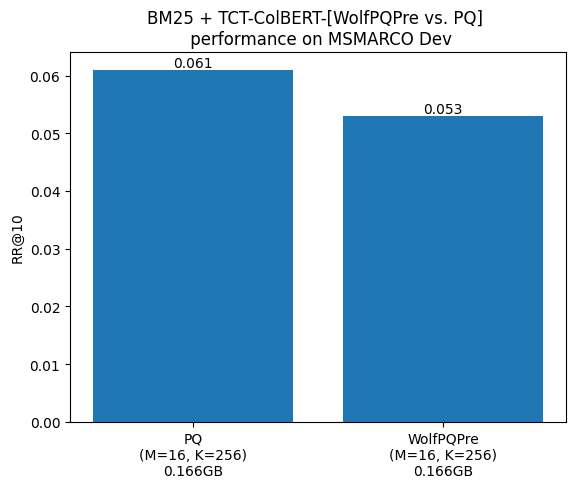

In [249]:
LABELS=['PQ\n(M=16, K=256)\n0.166GB', 'WolfPQPre\n(M=16, K=256)\n0.166GB']
SCORES=[0.061, 0.053]
fig, ax = plt.subplots()
bars = ax.bar(LABELS, SCORES)
# Add labels to bars
ax.bar_label(bars)
ax.set_ylabel("RR@10")
ax.set_title('BM25 + TCT-ColBERT-[WolfPQPre vs. PQ] \n performance on MSMARCO Dev')
plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_pretraining/pretraining_small.png')

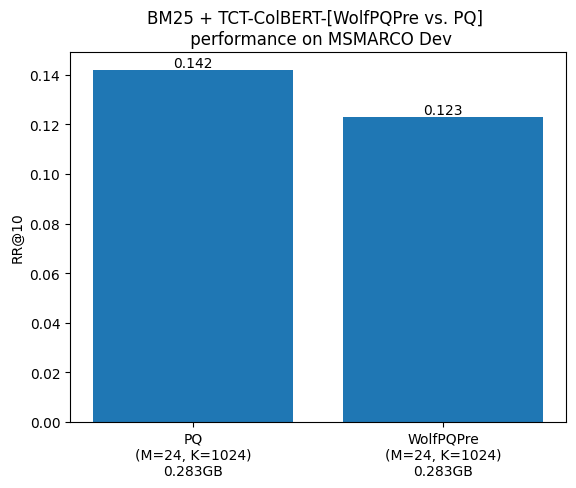

In [250]:
LABELS=['PQ\n(M=24, K=1024)\n0.283GB', 'WolfPQPre\n(M=24, K=1024)\n0.283GB']
SCORES=[0.142, 0.123]
fig, ax = plt.subplots()
bars = ax.bar(LABELS, SCORES)
# Add labels to bars
ax.bar_label(bars)
ax.set_ylabel("RR@10")
ax.set_title('BM25 + TCT-ColBERT-[WolfPQPre vs. PQ] \n performance on MSMARCO Dev')
plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_pretraining/pretraining_medium.png')

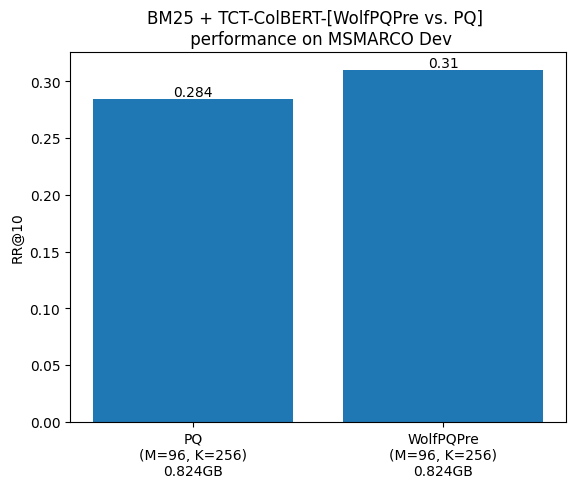

In [251]:
LABELS=['PQ\n(M=96, K=256)\n0.824GB', 'WolfPQPre\n(M=96, K=256)\n0.824GB']
SCORES=[0.284, 0.310]
fig, ax = plt.subplots()
bars = ax.bar(LABELS, SCORES)
# Add labels to bars
ax.bar_label(bars)
ax.set_ylabel("RR@10")
ax.set_title('BM25 + TCT-ColBERT-[WolfPQPre vs. PQ] \n performance on MSMARCO Dev')
plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_pretraining/pretraining_large.png')

## Finetuning

### Listwise Loss vs Pointwise Loss

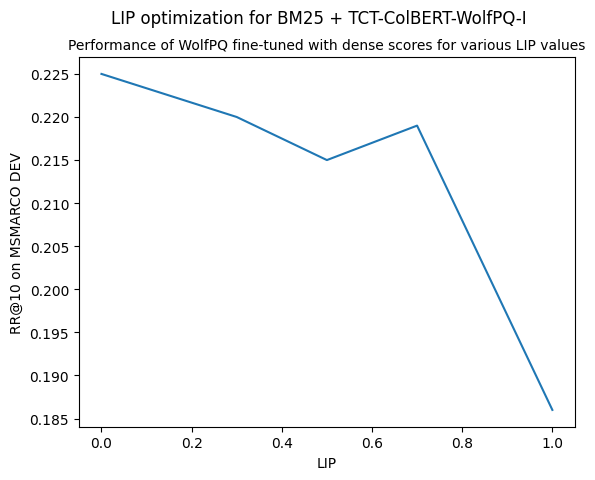

In [264]:
# Trained with dense scores

LIP = [0, 0.3, 0.5, 0.7, 1.0]
RR = [0.225, 0.220, 0.215, 0.219, 0.186]


plt.suptitle('LIP optimization for BM25 + TCT-ColBERT-WolfPQ-I')
plt.title('Performance of WolfPQ fine-tuned with dense scores for various LIP values', fontsize=10)
plt.plot(LIP, RR)
plt.xlabel('LIP')
plt.ylabel('RR@10 on MSMARCO DEV')
plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_finetuning/dense_lip_optimization.png')

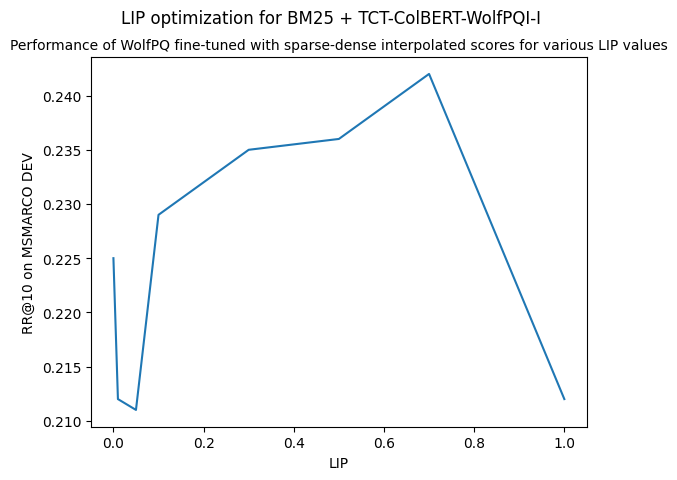

In [265]:
LIP = [0, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0]
RR = [0.225, 0.212, 0.211, 0.229, 0.235, 0.236, 0.242, 0.212]


plt.suptitle('LIP optimization for BM25 + TCT-ColBERT-WolfPQI-I')
plt.title('Performance of WolfPQ fine-tuned with sparse-dense interpolated scores for various LIP values', fontsize=10)
plt.plot(LIP, RR)
plt.xlabel('LIP')
plt.ylabel('RR@10 on MSMARCO DEV')
plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_finetuning/sparse_dense_lip_optimization.png')

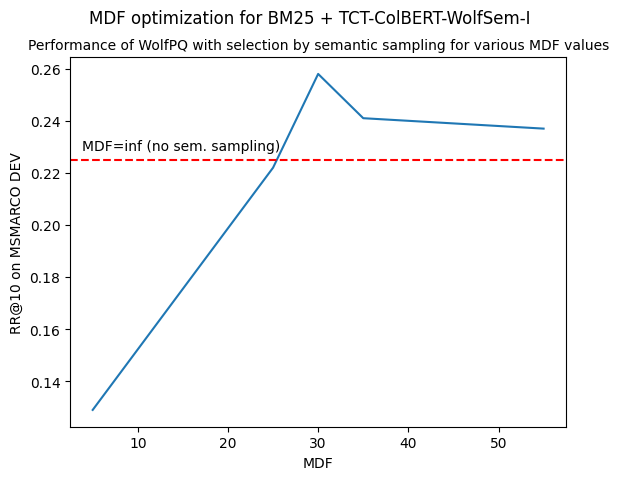

In [284]:
# Optimization of the MDF parameter

MDF = [5.0, 25.0, 30.0, 35.0, 55.0]
RR = [0.129, 0.222, 0.258, 0.241, 0.237]


plt.suptitle('MDF optimization for BM25 + TCT-ColBERT-WolfSem-I')
plt.title('Performance of WolfPQ with selection by semantic sampling for various MDF values', fontsize=10)
plt.plot(MDF, RR)
plt.xlabel('MDF')
plt.ylabel('RR@10 on MSMARCO DEV')
plt.axhline(y=0.225, color='red', linestyle='--', label='Selection by minimum distance')
plt.annotate('MDF=inf (no sem. sampling)', (3, 0.225), xytext=(5, 5), textcoords="offset points", ha="left", va="bottom")

plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_finetuning/mdf_optimization.png')

## RQ3 Final Results

### PQ vs WolfPQ Bar Plots 2019

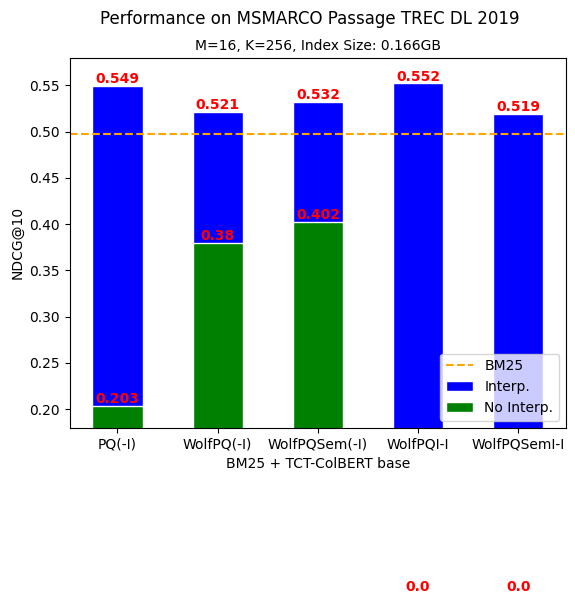

In [66]:
# Small Size


M=16
K=256
index_size=0.166

bm25_score = 0.497
normal_scores = [0.203, 0.380, 0.402, 0 ,0]
interpolated_scores = [0.549, 0.521, 0.532, 0.552, 0.519]


labels = ['PQ(-I)', 'WolfPQ(-I)', 'WolfPQSem(-I)', 'WolfPQI-I', 'WolfPQSemI-I']
bar_width = 0.5
r = np.arange(len(normal_scores))

bar1 = plt.bar(r, interpolated_scores, color='b', width=bar_width, edgecolor='white', label='Interp.', align='edge')
bar2 = plt.bar(r, normal_scores, color='g', width=bar_width, edgecolor='white', label='No Interp.', align='edge')

for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontweight='bold', c='red')

plt.axhline(y=bm25_score, color='orange', linestyle='--', label='BM25')


plt.xticks(r + 0.25, labels)
plt.xlabel(f'BM25 + TCT-ColBERT base')
plt.ylabel('NDCG@10')
plt.suptitle('Performance on MSMARCO Passage TREC DL 2019')
plt.title(f'M={M}, K={K}, Index Size: {index_size}GB', fontsize=10)
plt.legend(loc='lower right')
plt.ylim(0.18, None)

plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_final/barplot_small_2019.png')

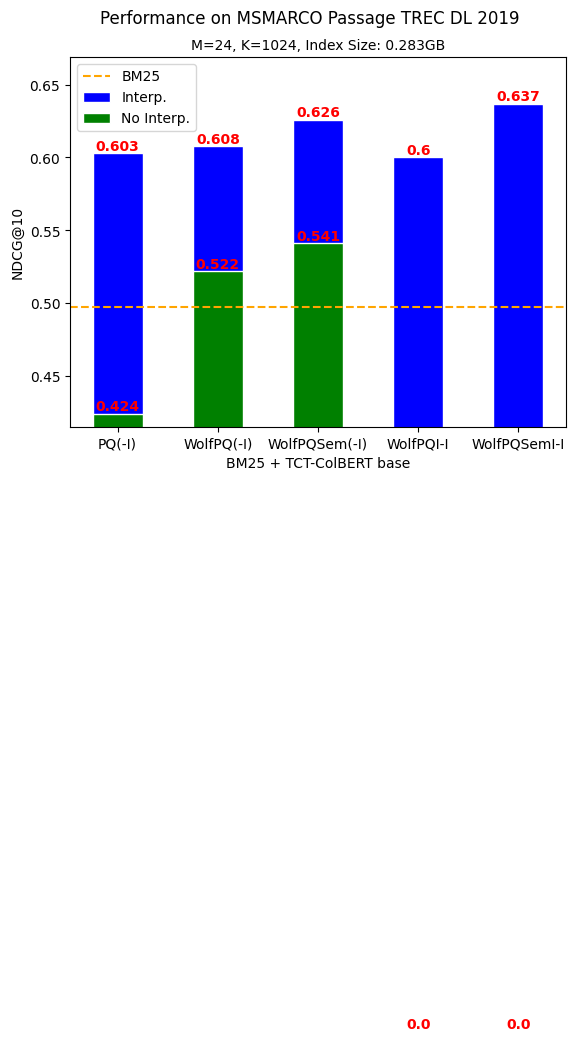

In [76]:
# Medium Size

M=24
K=1024
index_size=0.283

bm25_score = 0.497
bm25_tct_score = 0.699
bm25_tct_score_inter = 0.719
normal_scores = [0.424, 0.522, 0.541, 0 ,0]
interpolated_scores = [0.603, 0.608, 0.626, 0.6, 0.637]


labels = ['PQ(-I)', 'WolfPQ(-I)', 'WolfPQSem(-I)', 'WolfPQI-I', 'WolfPQSemI-I']
bar_width = 0.5
r = np.arange(len(normal_scores))

bar1 = plt.bar(r, interpolated_scores, color='b', width=bar_width, edgecolor='white', label='Interp.', align='edge')
bar2 = plt.bar(r, normal_scores, color='g', width=bar_width, edgecolor='white', label='No Interp.', align='edge')

for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontweight='bold', c='red')

plt.axhline(y=bm25_score, color='orange', linestyle='--', label='BM25')
# plt.axhline(y=bm25_tct_score, color='orange', linestyle='--', label='BM25 + TCT-ColBERT')
# plt.axhline(y=bm25_tct_score_inter, color='purple', linestyle='--', label='BM25 + TCT-ColBERT-I')


plt.xticks(r + 0.25, labels)
plt.xlabel(f'BM25 + TCT-ColBERT base')
plt.ylabel('NDCG@10')
plt.suptitle('Performance on MSMARCO Passage TREC DL 2019')
plt.title(f'M={M}, K={K}, Index Size: {index_size}GB', fontsize=10)
plt.legend()
plt.ylim(0.415, None)

plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_final/barplot_medium_2019.png')

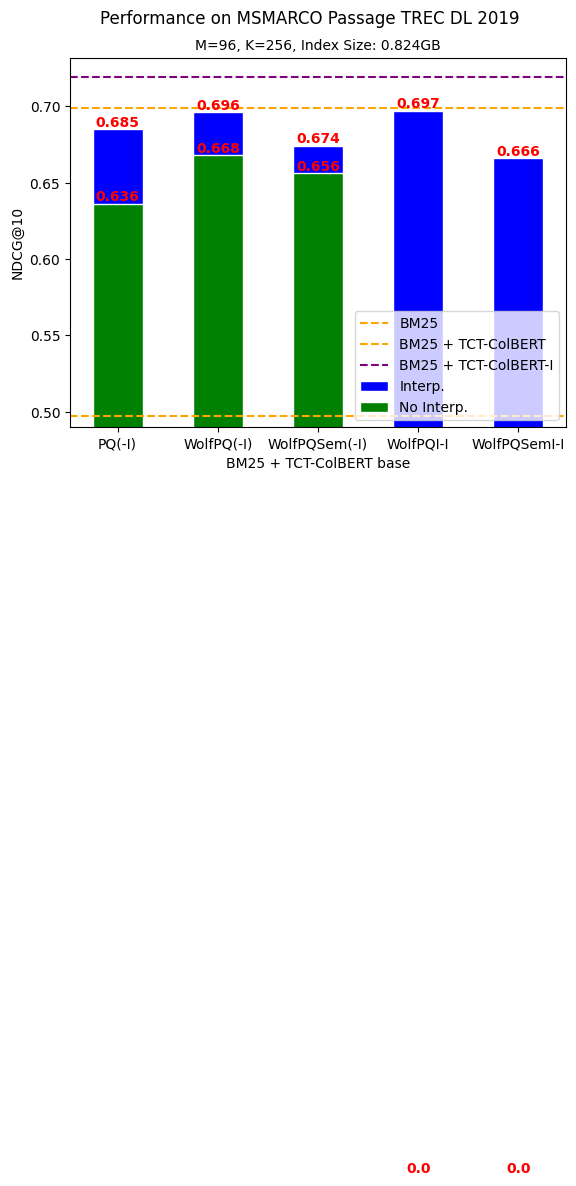

In [77]:
# Large

M=96
K=256
index_size=0.824

bm25_score = 0.497
bm25_tct_score = 0.699
bm25_tct_score_inter = 0.719
normal_scores = [0.636, 0.668, 0.656, 0 ,0]
interpolated_scores = [0.685, 0.696, 0.674, 0.697, 0.666]


labels = ['PQ(-I)', 'WolfPQ(-I)', 'WolfPQSem(-I)', 'WolfPQI-I', 'WolfPQSemI-I']
bar_width = 0.5
r = np.arange(len(normal_scores))

bar1 = plt.bar(r, interpolated_scores, color='b', width=bar_width, edgecolor='white', label='Interp.', align='edge')
bar2 = plt.bar(r, normal_scores, color='g', width=bar_width, edgecolor='white', label='No Interp.', align='edge')

for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontweight='bold', c='red')

plt.axhline(y=bm25_score, color='orange', linestyle='--', label='BM25')
plt.axhline(y=bm25_tct_score, color='orange', linestyle='--', label='BM25 + TCT-ColBERT')
plt.axhline(y=bm25_tct_score_inter, color='purple', linestyle='--', label='BM25 + TCT-ColBERT-I')


plt.xticks(r + 0.25, labels)
plt.xlabel(f'BM25 + TCT-ColBERT base')
plt.ylabel('NDCG@10')
plt.suptitle('Performance on MSMARCO Passage TREC DL 2019')
plt.title(f'M={M}, K={K}, Index Size: {index_size}GB', fontsize=10)
plt.legend(loc='lower right')
plt.ylim(0.49, None)

plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_final/barplot_large_2019.png')

# PQ vs WolfPQ Bar plots 2020

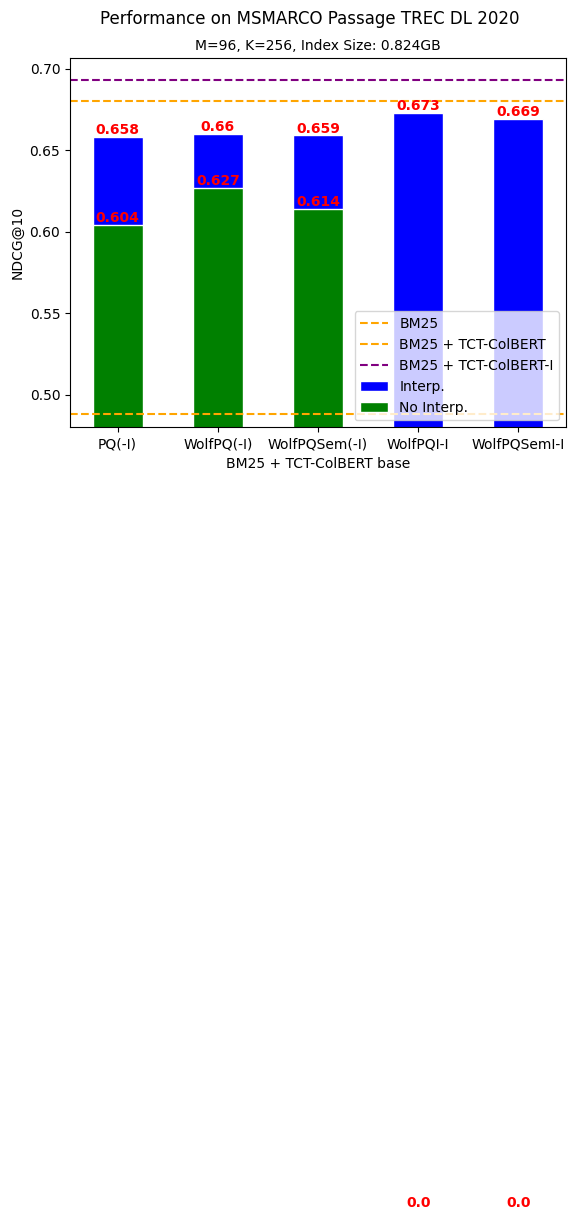

In [78]:
# Large Size


M=96
K=256
index_size=0.824

bm25_score = 0.488
bm25_tct_score = 0.680
bm25_tct_score_inter = 0.693
normal_scores = [0.604, 0.627, 0.614, 0 ,0]
interpolated_scores = [0.658, 0.660, 0.659, 0.673, 0.669]


labels = ['PQ(-I)', 'WolfPQ(-I)', 'WolfPQSem(-I)', 'WolfPQI-I', 'WolfPQSemI-I']
bar_width = 0.5
r = np.arange(len(normal_scores))

bar1 = plt.bar(r, interpolated_scores, color='b', width=bar_width, edgecolor='white', label='Interp.', align='edge')
bar2 = plt.bar(r, normal_scores, color='g', width=bar_width, edgecolor='white', label='No Interp.', align='edge')

for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontweight='bold', c='red')

plt.axhline(y=bm25_score, color='orange', linestyle='--', label='BM25')
plt.axhline(y=bm25_tct_score, color='orange', linestyle='--', label='BM25 + TCT-ColBERT')
plt.axhline(y=bm25_tct_score_inter, color='purple', linestyle='--', label='BM25 + TCT-ColBERT-I')


plt.xticks(r + 0.25, labels)
plt.xlabel(f'BM25 + TCT-ColBERT base')
plt.ylabel('NDCG@10')
plt.suptitle('Performance on MSMARCO Passage TREC DL 2020')
plt.title(f'M={M}, K={K}, Index Size: {index_size}GB', fontsize=10)
plt.legend(loc='lower right')
plt.ylim(0.48, None)

plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_final/barplot_large_2020.png')

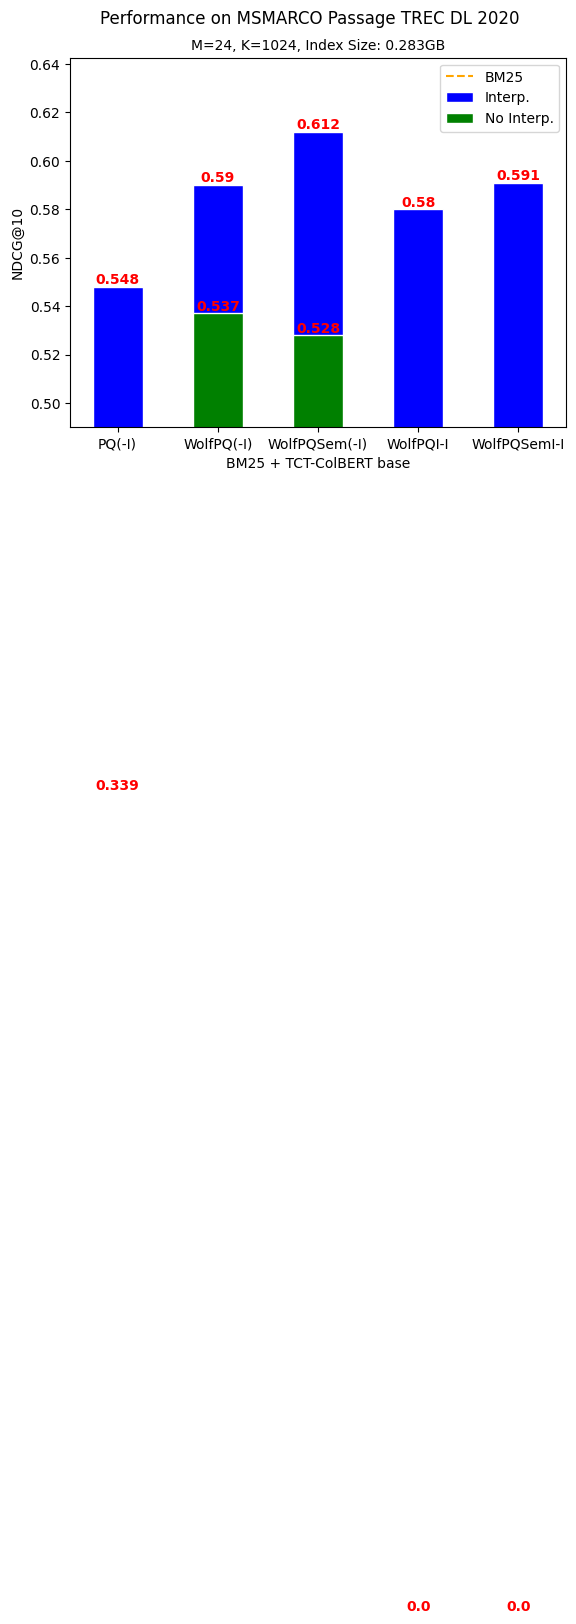

In [79]:
# Medium Size

M=24
K=1024
index_size=0.283

bm25_score = 0.488
normal_scores = [0.339, 0.537, 0.528, 0 ,0]
interpolated_scores = [0.548, 0.590, 0.612, 0.58, 0.591]


labels = ['PQ(-I)', 'WolfPQ(-I)', 'WolfPQSem(-I)', 'WolfPQI-I', 'WolfPQSemI-I']
bar_width = 0.5
r = np.arange(len(normal_scores))

bar1 = plt.bar(r, interpolated_scores, color='b', width=bar_width, edgecolor='white', label='Interp.', align='edge')
bar2 = plt.bar(r, normal_scores, color='g', width=bar_width, edgecolor='white', label='No Interp.', align='edge')

for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontweight='bold', c='red')

plt.axhline(y=bm25_score, color='orange', linestyle='--', label='BM25')


plt.xticks(r + 0.25, labels)
plt.xlabel(f'BM25 + TCT-ColBERT base')
plt.ylabel('NDCG@10')
plt.suptitle('Performance on MSMARCO Passage TREC DL 2020')
plt.title(f'M={M}, K={K}, Index Size: {index_size}GB', fontsize=10)
plt.legend()
plt.ylim(0.49, None)

plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_final/barplot_medium_2020.png')

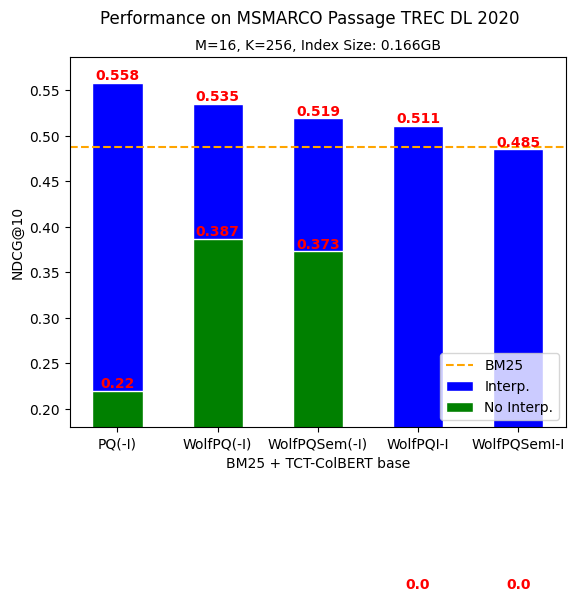

In [81]:
# Small Size


M=16
K=256
index_size=0.166

bm25_score = 0.488
normal_scores = [0.220, 0.387, 0.373, 0 ,0]
interpolated_scores = [0.558, 0.535, 0.519, 0.511, 0.485]


labels = ['PQ(-I)', 'WolfPQ(-I)', 'WolfPQSem(-I)', 'WolfPQI-I', 'WolfPQSemI-I']
bar_width = 0.5
r = np.arange(len(normal_scores))

bar1 = plt.bar(r, interpolated_scores, color='b', width=bar_width, edgecolor='white', label='Interp.', align='edge')
bar2 = plt.bar(r, normal_scores, color='g', width=bar_width, edgecolor='white', label='No Interp.', align='edge')

for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontweight='bold', c='red')

plt.axhline(y=bm25_score, color='orange', linestyle='--', label='BM25')


plt.xticks(r + 0.25, labels)
plt.xlabel(f'BM25 + TCT-ColBERT base')
plt.ylabel('NDCG@10')
plt.suptitle('Performance on MSMARCO Passage TREC DL 2020')
plt.title(f'M={M}, K={K}, Index Size: {index_size}GB', fontsize=10)
plt.legend(loc='lower right')
plt.ylim(0.18, None)

plt.savefig('/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_final/barplot_small_2020.png')

# WolfPQ Final plot

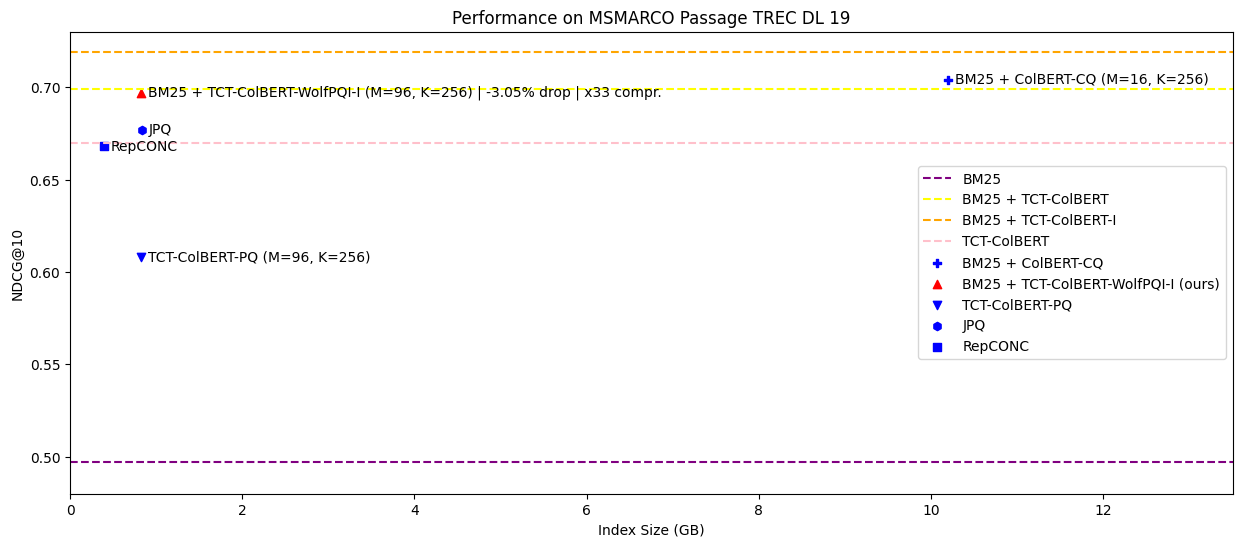

In [110]:
# Test 2019

data = {
    'BM25 + ColBERT-CQ': [(10.2, 0.704, 'BM25 + ColBERT-CQ (M=16, K=256)')],
    'BM25 + TCT-ColBERT-WolfPQI-I (ours)': [
        (0.824, 0.697, 'BM25 + TCT-ColBERT-WolfPQI-I (M=96, K=256) | -3.05% drop | x33 compr.')
    ],
    'TCT-ColBERT-PQ': [
        (0.824, 0.608, 'TCT-ColBERT-PQ (M=96, K=256)')
    ],
    'JPQ': [
        (0.83, 0.677, 'JPQ')
    ],
    'RepCONC': [
        (0.393, 0.668, 'RepCONC')
    ]
}

color_map = {
        'BM25 + ColBERT-CQ': ('blue', 'P'),
        'TCT-ColBERT-PQ': ('blue', 'v'),
        'JPQ': ('blue', 'h'),
        'RepCONC': ('blue', 's'),
        'BM25 + TCT-ColBERT-WolfPQI-I (ours)': ('red', '^'),
}

lines = [
    (0.497, 'BM25', 'purple', '--', False),
    (0.699, 'BM25 + TCT-ColBERT', 'yellow', '--', False),
    (0.719, 'BM25 + TCT-ColBERT-I', 'orange', '--', False),
    (0.670, 'TCT-ColBERT', 'pink', '--', False),
]


plt.figure(figsize=(15, 6))
plt.ylim(0.48, 0.73)
plt.xlabel('Index Size (GB)')
plt.ylabel('NDCG@10')
plt.title('Performance on MSMARCO Passage TREC DL 19')
plot_scatter(data, color_map, lines, 13.5, legend=True, 
             save_path='/home/catalinlup/MyWorkspace/MasterThesis/results/final_result_plots/rq3_final/final_plot.png')